<a href="https://colab.research.google.com/github/Anishoond/Prediccion-del-tiempo-de-permanencia-de-pacientes-en-un-hospital/blob/main/01_Exploraci%C3%B3n_de_archivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Obtencion de los archivos en formato Zip desde repositorio Github
!wget https://github.com/anishoond/Archivos_Proyecto/blob/main/Archivos_proyecto.zip?raw=true

--2023-04-09 14:05:11--  https://github.com/anishoond/Archivos_Proyecto/blob/main/Archivos_proyecto.zip?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/anishoond/Archivos_Proyecto/raw/main/Archivos_proyecto.zip [following]
--2023-04-09 14:05:11--  https://github.com/anishoond/Archivos_Proyecto/raw/main/Archivos_proyecto.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/anishoond/Archivos_Proyecto/main/Archivos_proyecto.zip [following]
--2023-04-09 14:05:11--  https://raw.githubusercontent.com/anishoond/Archivos_Proyecto/main/Archivos_proyecto.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|

In [51]:
 # Se descomprimen los archivos
 !unzip /content/Archivos_proyecto.zip?raw=true

Archive:  /content/Archivos_proyecto.zip?raw=true
  inflating: sample_submission.csv   
  inflating: train.csv               
  inflating: train_data_dict.csv     
  inflating: test.csv                


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#Se carga la base de datos
data_train = pd.read_csv("train.csv",index_col=0)
data_test = pd.read_csv("test.csv",index_col=0) #Dataset adicional para prueba
data_train.head(15)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60


In [54]:
# Variables
data_train.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [55]:
data_test.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [56]:
# Tamaño del dataset
print(data_train.shape)
print(data_test.shape) #Dataset adicional para prueba

(318438, 17)
(137057, 16)


In [57]:
# Tipo de datos en el dataset
for c in data_train.columns:
    print ("%20s"%c, data_train[c].dtype)

       Hospital_code int64
  Hospital_type_code object
  City_Code_Hospital int64
Hospital_region_code object
Available Extra Rooms in Hospital int64
          Department object
           Ward_Type object
  Ward_Facility_Code object
           Bed Grade float64
           patientid int64
   City_Code_Patient float64
   Type of Admission object
 Severity of Illness object
Visitors with Patient int64
                 Age object
   Admission_Deposit float64
                Stay object


In [58]:
#Variables categóricas
ccols = [i for i in data_train.columns if not i in dtr._get_numeric_data()]
for c in ccols:
    print ("%10s"%c, np.unique(data_train[c].dropna()))

Hospital_type_code ['a' 'b' 'c' 'd' 'e' 'f' 'g']
Hospital_region_code ['X' 'Y' 'Z']
Department ['TB & Chest disease' 'anesthesia' 'gynecology' 'radiotherapy' 'surgery']
 Ward_Type ['P' 'Q' 'R' 'S' 'T' 'U']
Ward_Facility_Code ['A' 'B' 'C' 'D' 'E' 'F']
Type of Admission ['Emergency' 'Trauma' 'Urgent']
Severity of Illness ['Extreme' 'Minor' 'Moderate']
       Age ['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100']
      Stay ['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100' 'More than 100 Days']


In [59]:
# Datos nulos presentes en el dataset de entrenamiento
k = data_train.isna().sum()
k[k!=0]

Bed Grade             113
City_Code_Patient    4532
dtype: int64

In [60]:
# Datos nulos presentes en el dataset de prueba adicional
k = data_test.isna().sum()
k[k!=0]

Bed Grade              35
City_Code_Patient    2157
dtype: int64

In [61]:
#Se eliminan columnas del Dataset
dtr=data_train.drop('Hospital_region_code',axis=1)
dtr=data_train.drop('Hospital_type_code',axis=1)
dtr=data_train.drop('Ward_Facility_Code',axis=1)
data_train.head(15)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60


In [62]:
#Visualiación de columnas numericas
data_train.select_dtypes(np.number).head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
case_id,,,,,,,,
1,8,3,3,2.0,31397,7.0,2,4911.0
2,2,5,2,2.0,31397,7.0,2,5954.0
3,10,1,2,2.0,31397,7.0,2,4745.0
4,26,2,2,2.0,31397,7.0,2,7272.0
5,26,2,2,2.0,31397,7.0,2,5558.0


In [63]:
#Eliminar datos nulos
data_train=data_train[~data_train.isna().any(axis=1)]

In [64]:
Department=pd.factorize(data_train['Department'])[0]
Ward_Type=pd.factorize(data_train['Ward_Type'])[0]
Type_Admission=pd.factorize(data_train['Type of Admission'])[0]
Severity=pd.factorize(data_train['Severity of Illness'])[0]
Age=pd.factorize(data_train['Age'])[0]
Stay=pd.factorize(data_train['Stay'])[0]

In [65]:
data_train['Department']=Department
data_train['Ward_Type']=Ward_Type
data_train['Type of Admission']=Type_Admission
data_train['Severity of Illness']=Severity
data_train['Age']=Age
data_train['Stay']=Stay

<ipython-input-65-bc8bec5bbc2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Department']=Department
<ipython-input-65-bc8bec5bbc2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Ward_Type']=Ward_Type


In [66]:
data_train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,0,0,F,2.0,31397,7.0,0,0,2,0,4911.0,0
2,2,c,5,Z,2,0,1,F,2.0,31397,7.0,1,0,2,0,5954.0,1
3,10,e,1,X,2,1,1,E,2.0,31397,7.0,1,0,2,0,4745.0,2
4,26,b,2,Y,2,0,0,D,2.0,31397,7.0,1,0,2,0,7272.0,1
5,26,b,2,Y,2,0,1,D,2.0,31397,7.0,1,0,2,0,5558.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,a,6,X,3,0,2,F,4.0,86499,23.0,0,1,3,3,4144.0,3
318435,24,a,1,X,2,1,2,E,4.0,325,8.0,2,1,4,4,6699.0,2
318436,7,a,4,X,3,2,0,F,4.0,125235,10.0,0,2,3,1,4235.0,3


In [67]:
# Tipo de datos en el dataset
for c in data_train.columns:
    print ("%20s"%c, data_train[c].dtype)

       Hospital_code int64
  Hospital_type_code object
  City_Code_Hospital int64
Hospital_region_code object
Available Extra Rooms in Hospital int64
          Department int64
           Ward_Type int64
  Ward_Facility_Code object
           Bed Grade float64
           patientid int64
   City_Code_Patient float64
   Type of Admission int64
 Severity of Illness int64
Visitors with Patient int64
                 Age int64
   Admission_Deposit float64
                Stay int64


<ipython-input-68-121d9813278d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['Stay'])


<Axes: xlabel='Stay', ylabel='Density'>

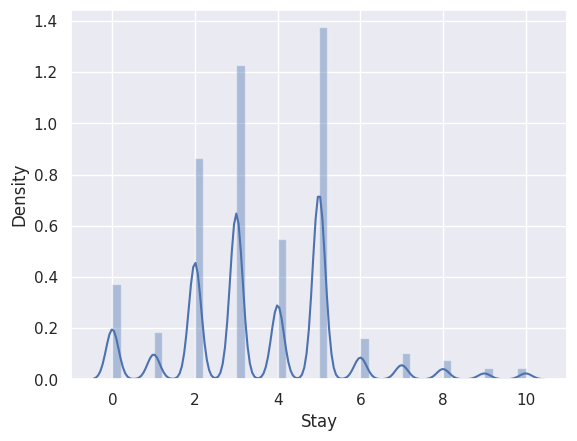

In [68]:
#Distribución de la variable objetivo
sns.distplot(data_train['Stay'])

In [69]:
#Variables numéricas
data_train._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
Hospital_code,313793.0,18.326419,8.633613,1.0,11.0,19.0,26.0,32.0
City_Code_Hospital,313793.0,4.778169,3.103237,1.0,2.0,5.0,7.0,13.0
Available Extra Rooms in Hospital,313793.0,3.196419,1.167924,0.0,2.0,3.0,4.0,24.0
Department,313793.0,1.764982,0.664359,0.0,2.0,2.0,2.0,4.0
Ward_Type,313793.0,0.976800,0.916463,0.0,0.0,1.0,2.0,5.0
Bed Grade,313793.0,2.622952,0.872618,1.0,2.0,3.0,3.0,4.0
patientid,313793.0,65743.029382,37978.083237,1.0,32833.0,65735.0,98472.0,131624.0
City_Code_Patient,313793.0,7.252447,4.745243,1.0,4.0,8.0,8.0,38.0
Type of Admission,313793.0,0.784613,0.689046,0.0,0.0,1.0,1.0,2.0
Severity of Illness,313793.0,1.090091,0.662730,0.0,1.0,1.0,2.0,2.0


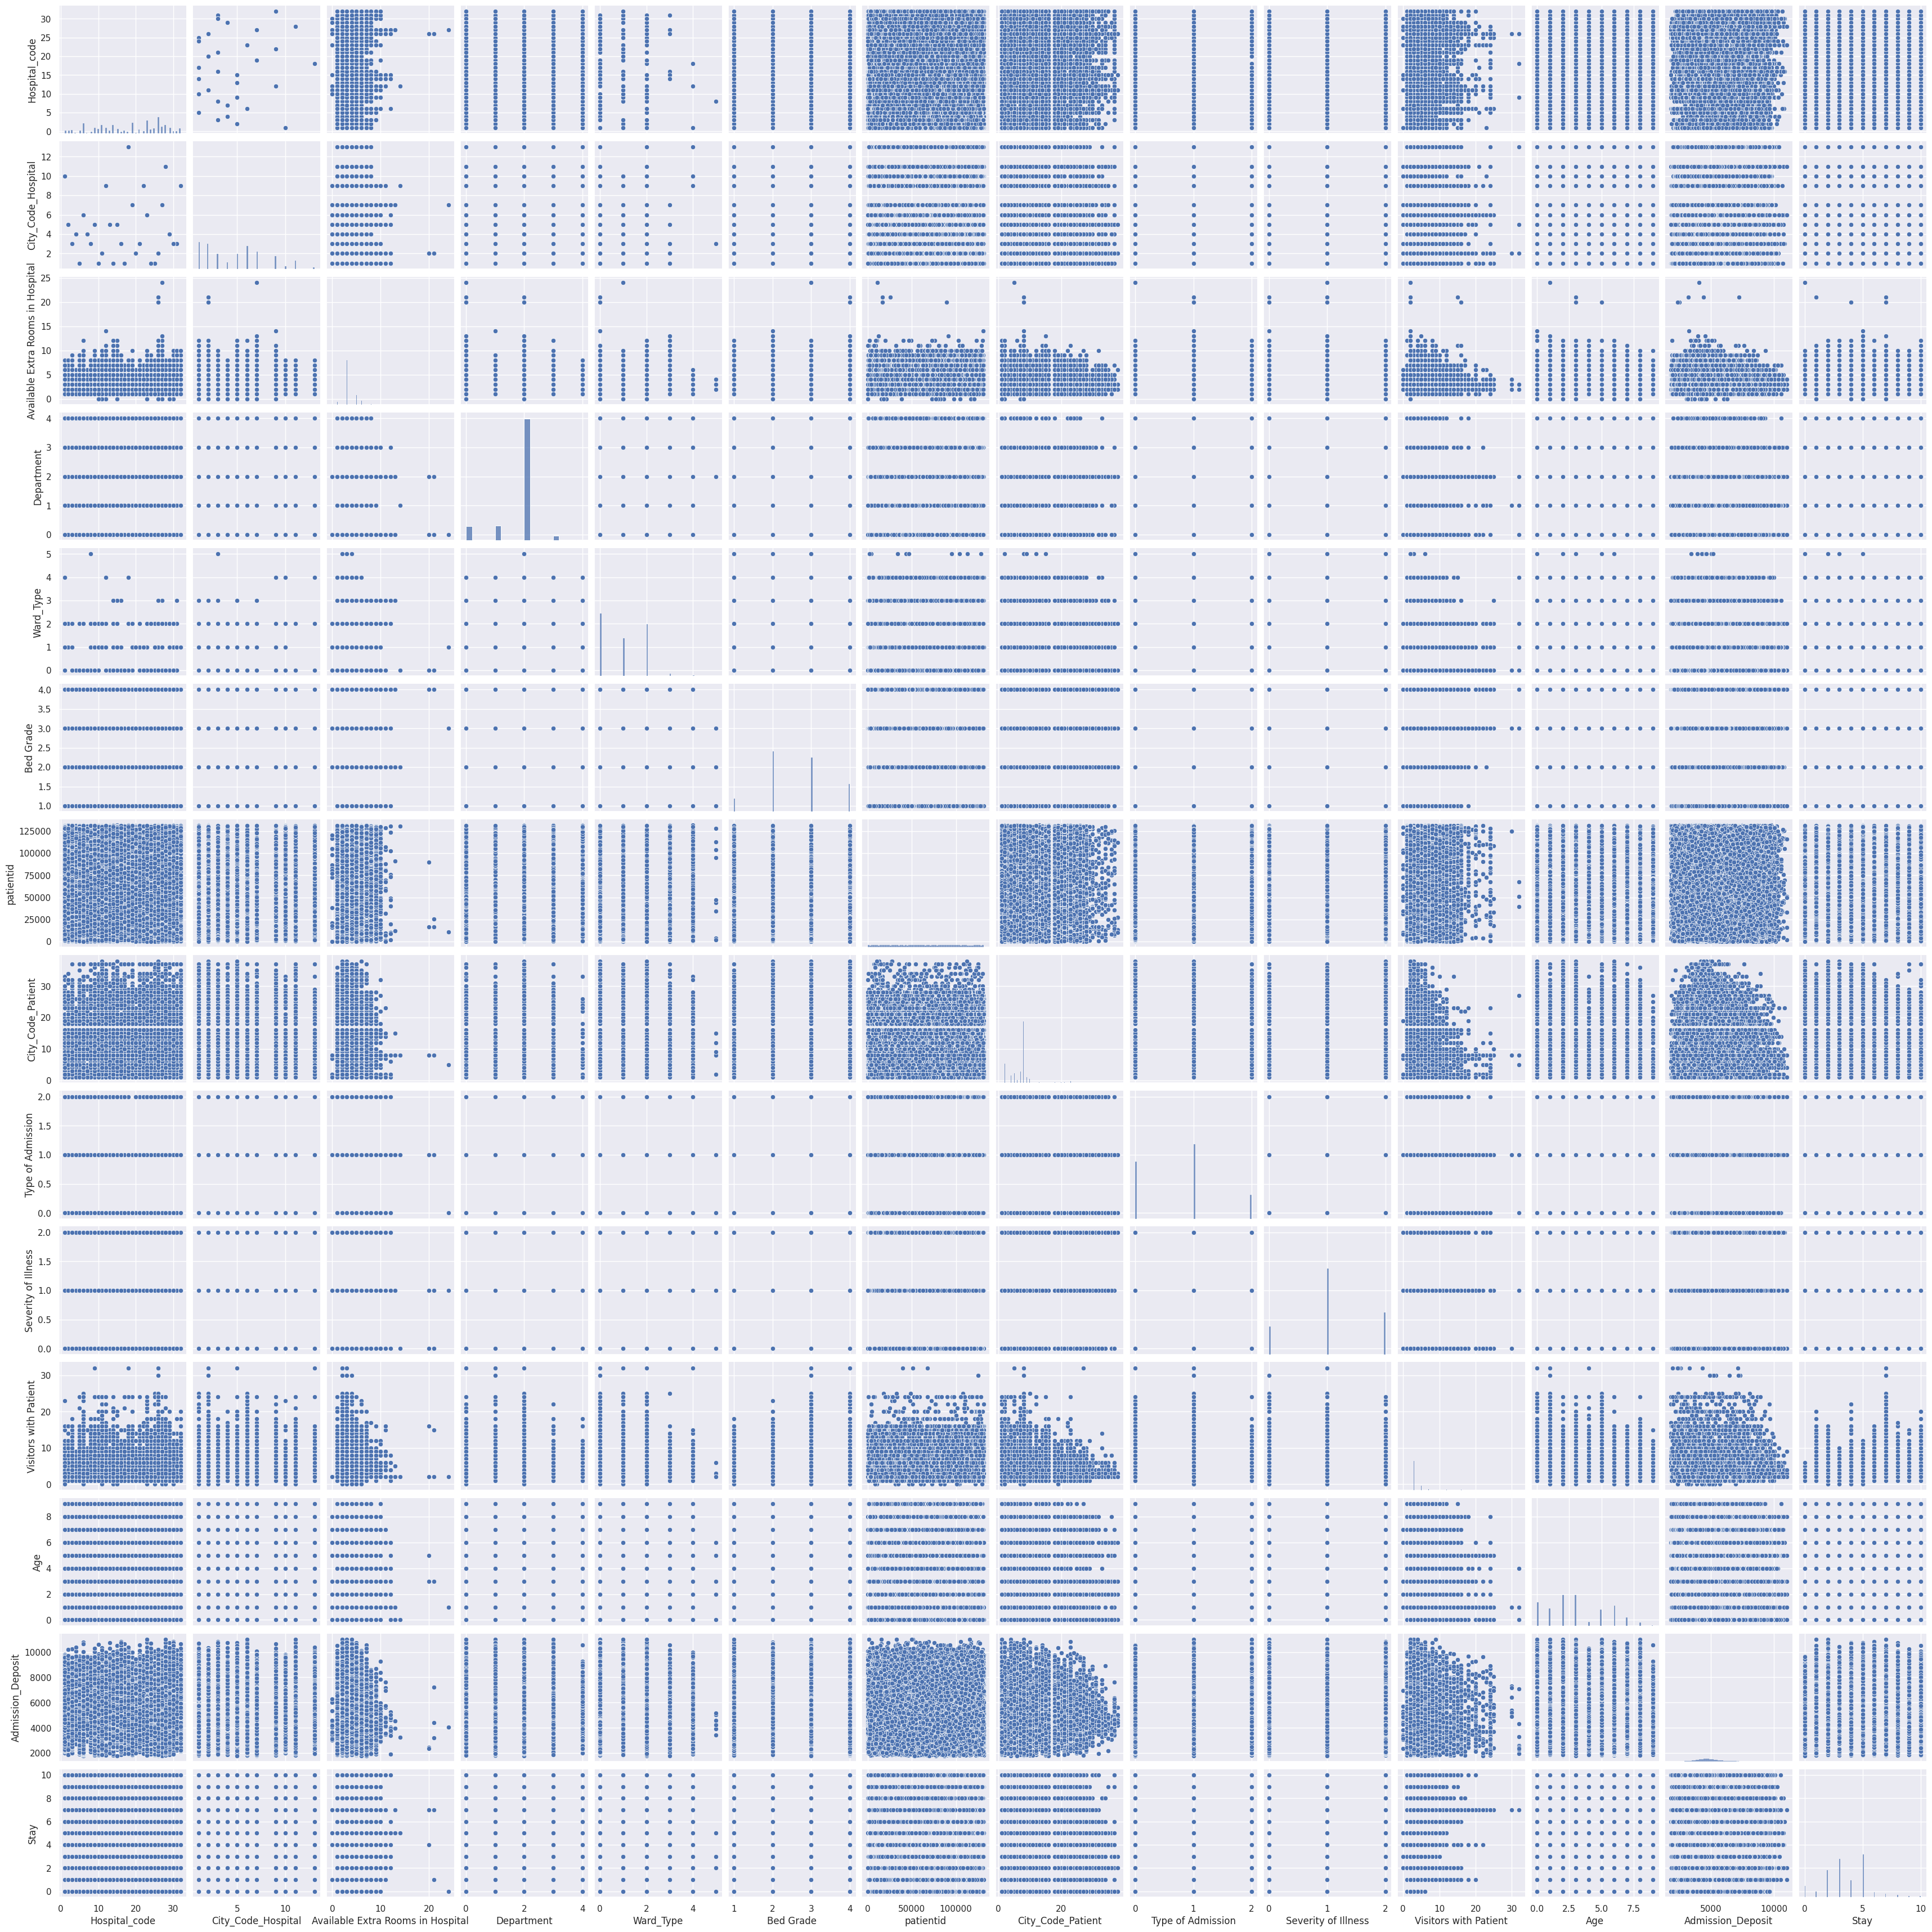

In [70]:
cols = ['Hospital_code',  'City_Code_Hospital','Available Extra Rooms in Hospital',
       'Department', 'Ward_Type',  'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay']
sns.set()
sns.pairplot(data_train[cols])

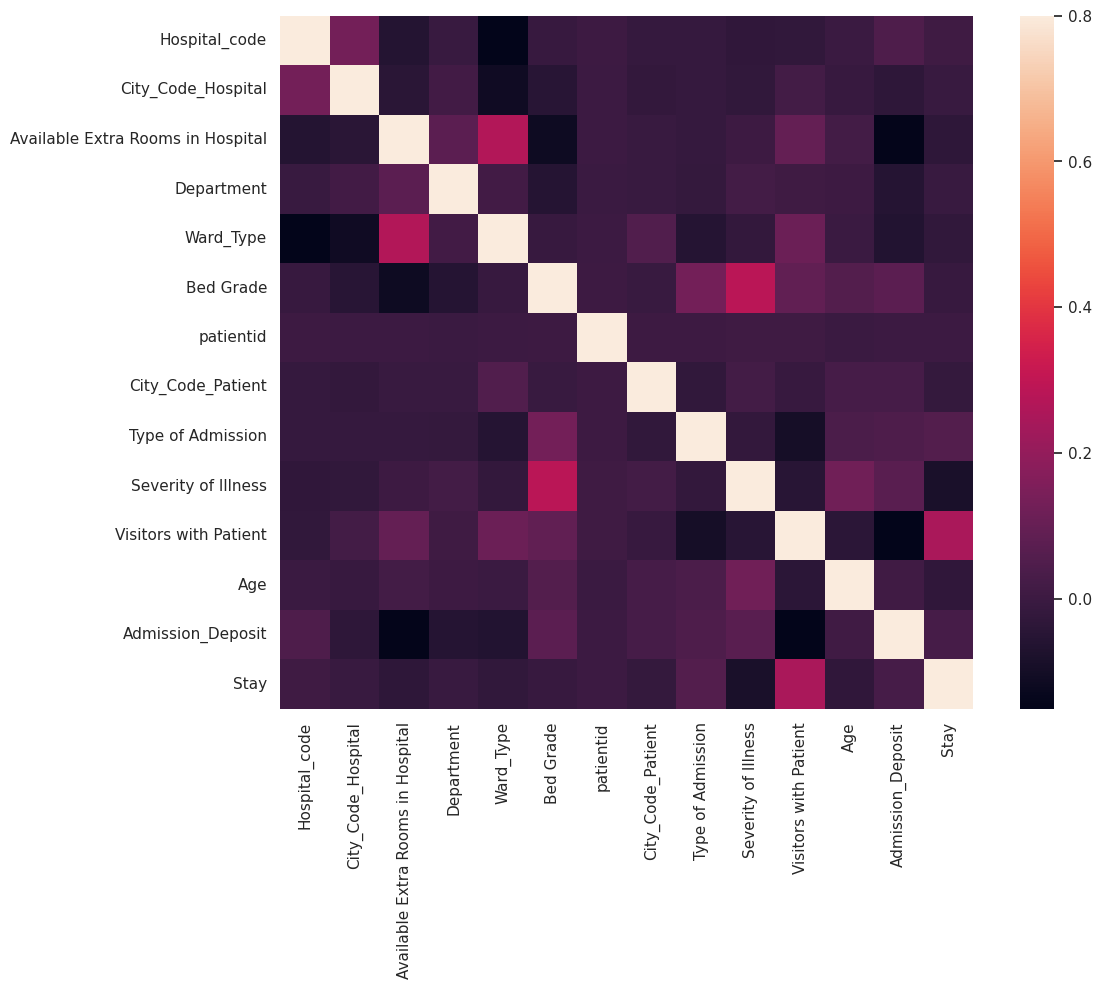

In [71]:
#Matriz de correlación
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);